In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [3]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W]
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    im_fft = np.fft.fft2(im) # Converting image to frequency domain
    result_fft = im_fft * fft_kernel # Convolving
    conv_result = np.fft.ifft2(result_fft).real # Reversing the fourier transform

    #This was taken from ../tutorials/frequency_domain.ipynb
    def magnitude(fft_im):
        real = fft_im.real
        imag = fft_im.imag
        return np.sqrt(real**2 + imag**2)

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))

        # Visualize image
        plt.subplot(1, 5, 1)
        plt.title("Original image")
        plt.imshow(im, cmap="gray")

        # Visualize FFT
        plt.subplot(1, 5, 2)
        plt.title("FFT of image")
        plt.imshow(np.fft.fftshift(np.log(magnitude(im_fft) + 1)), cmap="gray")

        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        plt.title("FFT of kernel")
        plt.imshow(np.fft.fftshift(np.log(fft_kernel + 1)).real, cmap="gray")

        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        plt.title("Filtered FFT image")
        plt.imshow(np.fft.fftshift(np.log(result_fft + 1)).real, cmap="gray")

        # Visualize filtered spatial image
        plt.subplot(1, 5, 5)
        plt.title("Filtered image")
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

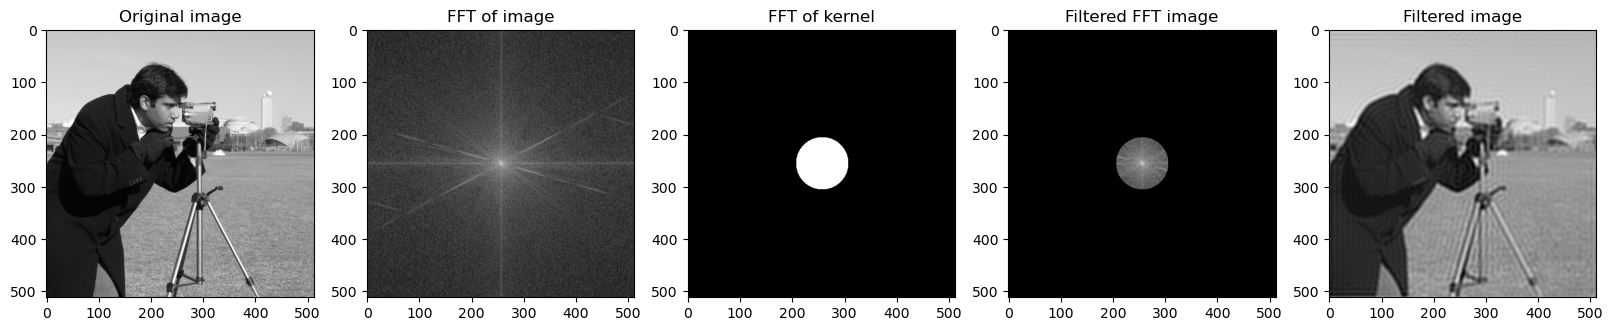

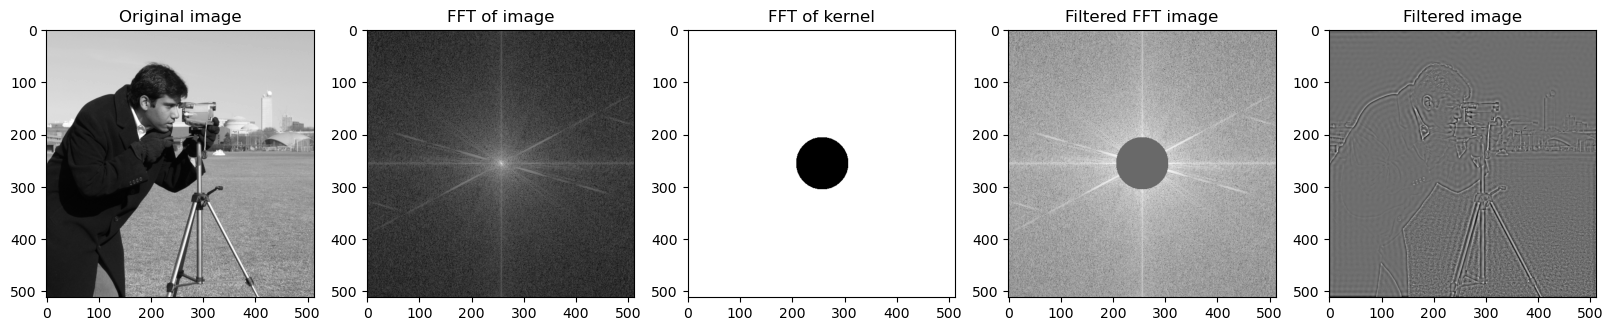

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


C:\Datateknologi\s1\visual\assignments\TDT4195-StarterCode-2023\assignment 2\utils.py:82: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [4]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)